In [1]:
# Node2Vec Snippet

# ADDITIONAL

## NODE 2 VEC
+ num of walks = number of random walsk to be generated from each node in the graph
+ walk length = how many nodes are in each random walk 
+ P = return hyperparameter (probability to return to the node, the walker is coming from)
+ Q = inout hyperparameter (probability to to explore undiscovered parts of the graph)

#### EXPLANATION
+ The algorithm for the random walk generation will go over each node in the graph and will generate "number of walks" random walks, of length "walk length"


##### RESOURCES
+ https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
+ https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb

In [88]:
walk_lngth = 100
num_wlks = 100
wrks = 1 
dmns = 20

node2vec = Node2Vec(G, dimensions=dmns, walk_length=walk_lngth, num_walks=num_wlks, workers=wrks)

Generating walks (CPU: 1): 100%|██████████| 100/100 [40:34<00:00, 24.35s/it]  


In [89]:
%%time 

model = node2vec.fit(window=10, min_count=1)

CPU times: user 6min 46s, sys: 7.7 s, total: 6min 54s
Wall time: 6min 56s


In [90]:
%%time 
embeddings = np.array([model.wv[x] for x in G.nodes()])

CPU times: user 17 ms, sys: 8.4 ms, total: 25.4 ms
Wall time: 32.8 ms


In [91]:
%%time 
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

CPU times: user 2min 40s, sys: 2.99 s, total: 2min 42s
Wall time: 22.6 s


In [92]:
posG = dict(zip(list(G.nodes()), embeddings_2d))

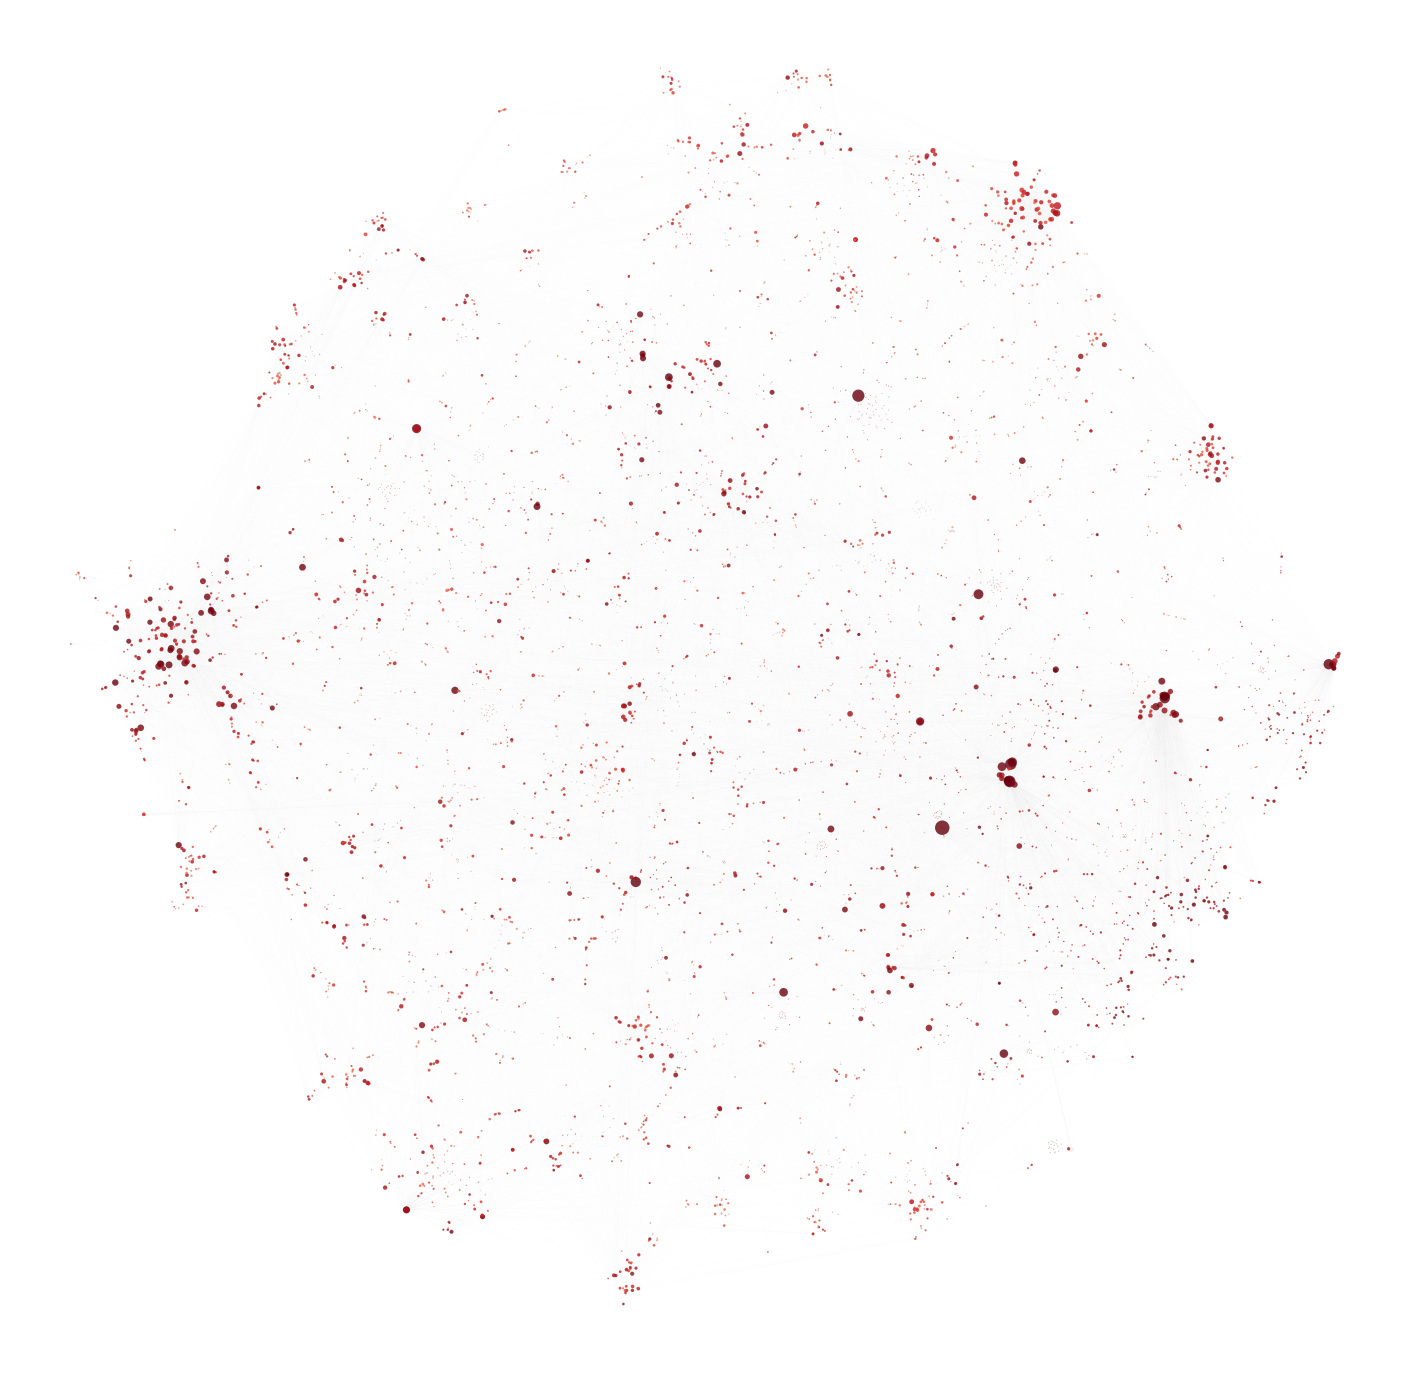

In [93]:
plt.figure(figsize=(25,25))

nx.draw_networkx_nodes(G, posG, edgecolors = node_edge_col, linewidths = 0.1, node_color = colours, node_size=size, alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
plt.box(False)

plt.savefig('output_plots/2Dnode2vec_'+'walklength'+str(walk_lngth)+'_numwalks'+str(num_wlks)+'_workers'+str(wrks)+'_dims'+str(dmns)+'_organism_nx.png')

plt.show()